In [21]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
from sklearn import datasets


**Data**

In [22]:
data = datasets.load_iris()
df = pd.DataFrame({
    'x': data.data[:,0],
    'y': data.data[:,1],
    'cluster' : data.target
})

In [23]:
#  sonar

data = pd.read_csv('https://pkgstore.datahub.io/machine-learning/sonar/sonar_csv/data/71dc2b4593995a5a1cff52824511fc61/sonar_csv.csv')

d_types=data.dtypes
for i in range(data.shape[1]):
    if d_types[i]=='object':
        Pr_data = preprocessing.LabelEncoder()
        data[data.columns[i]]=Pr_data.fit_transform(data[data.columns[i]])

data= np.array(data)
print(data)

[[0.02   0.0371 0.0428 ... 0.009  0.0032 1.    ]
 [0.0453 0.0523 0.0843 ... 0.0052 0.0044 1.    ]
 [0.0262 0.0582 0.1099 ... 0.0095 0.0078 1.    ]
 ...
 [0.0522 0.0437 0.018  ... 0.0077 0.0031 0.    ]
 [0.0303 0.0353 0.049  ... 0.0036 0.0048 0.    ]
 [0.026  0.0363 0.0136 ... 0.0061 0.0115 0.    ]]


<ipython-input-23-192367b0170b>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if d_types[i]=='object':


**input**

In [24]:
k= int(input('K = '))
centroid_technic = input('Chose the centroid technic [ 1-Rondom / 2-Deterministic ] :')
distance_technic =input('Chose the distance technic (1-Euclidean /2- Manhatten) : ')

while True:
    if k ==3 and centroid_technic == "2":
        print(f"cluster 1 :mini \rcluster 2 :mean \rcluster 3 : max")
    elif k >3 and centroid_technic =="2":
        print("choose new k & centeoid technic.[k=>3 or centroid technic = 1]")
        k= int(input('K = '))
        centroid_technic = input('Chose the centroid technic [ 1-Rondom / 2-Deterministic ] :')
    else :
        break

K = 3
Chose the centroid technic [ 1-Rondom / 2-Deterministic ] :1
Chose the distance technic (1-Euclidean /2- Manhatten) : 2


**----- < < Centroid > > -----**

In [25]:
def cal_centroid (data, k , centroid_technic):                                  #   ----- < < Centroid > > -----
                            #================================================

                        #   ----- < < Rondom > > -----
        if centroid_technic == "rondom" or centroid_technic == "1" :            #   ----- < < Rondom > > -----
            # Randomly initialize centroids
            centroids = data[np.random.choice(len(data), k, replace=False)]
#   =========================================
                        #   ----- < < Deterministic > > -----
        elif centroid_technic == "deterministic" or centroid_technic == "2" :   #   ----- < < Deternibistic > > -----
            centroids=[]
            sum , max , index_max , index_mini=0,0,0,0
            mini = float('inf')
            for index , i in enumerate(data):
                for j in i :
                    sum+=j
                if sum >max:                           # calculate max
                    max = sum
                    index_max = index
                    if mini > max :
                        mini = sum
                        index_mini = index

                elif sum < mini :                           # calculate mini
                    mini = sum
                    index_mini = index
                    print(j)
                sum=0
            centroids.append(data[index_mini])
            centroids.append(data[index_max])
                                                            # mean
            if k==3 and centroid_technic == "deterministic" or centroid_technic == "2" :
                meanToCentroid=np.mean(data,axis=0)
                centroids.append(meanToCentroid.tolist())

        return centroids

centroid=cal_centroid(data, k , centroid_technic)
print(centroid)

[[0.0265 0.044  0.0137 0.0084 0.0305 0.0438 0.0341 0.078  0.0844 0.0779
  0.0327 0.206  0.1908 0.1065 0.1457 0.2232 0.207  0.1105 0.1078 0.1165
  0.2224 0.0689 0.206  0.2384 0.0904 0.2278 0.5872 0.8457 0.8467 0.7679
  0.8055 0.626  0.6545 0.8747 0.9885 0.9348 0.696  0.5733 0.5872 0.6663
  0.5651 0.5247 0.3684 0.1997 0.1512 0.0508 0.0931 0.0982 0.0524 0.0188
  0.01   0.0038 0.0187 0.0156 0.0068 0.0097 0.0073 0.0081 0.0086 0.0095
  1.    ]
 [0.0072 0.0027 0.0089 0.0061 0.042  0.0865 0.1182 0.0999 0.1976 0.2318
  0.2472 0.288  0.2126 0.0708 0.1194 0.2808 0.4221 0.5279 0.5857 0.6153
  0.6753 0.7873 0.8974 0.9828 1.     0.846  0.6055 0.3036 0.0144 0.2526
  0.4335 0.4918 0.5409 0.5961 0.5248 0.3777 0.2369 0.172  0.1878 0.325
  0.2575 0.2423 0.2706 0.2323 0.1724 0.1457 0.1175 0.0868 0.0392 0.0131
  0.0092 0.0078 0.0071 0.0081 0.0034 0.0064 0.0037 0.0036 0.0012 0.0037
  0.    ]
 [0.0443 0.0446 0.0235 0.1008 0.2252 0.2611 0.2061 0.1668 0.1801 0.3083
  0.3794 0.5364 0.6173 0.7842 0.8392 0.9016 1

**----- < < plot iris > > -----**

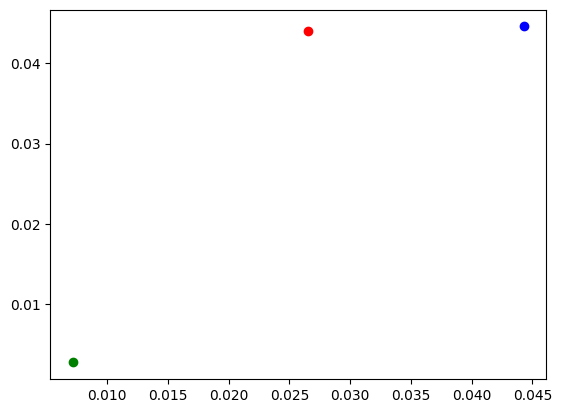

In [26]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroid[i][0],centroid[i][1], color=colmap[i])
plt.show()

In [27]:
max_iters=100
for _ in range(max_iters):
    # Convert centroid to a NumPy array
    centroid = np.array(centroid)

    if distance_technic == '1'or distance_technic == "Euclidean" or distance_technic == 'euclidean':
        # Ecludian distance
        distances = np.sqrt(((data - centroid[:, np.newaxis])**2).sum(axis=2))
    else:
        # Manhattn distance
        distances = np.sum(np.abs(data - centroid[:, np.newaxis]), axis=2)

    #calculate the shortest distance
    labels = np.argmin(distances, axis=0)

    # New centroid
    new_centers = np.array([data[labels == i].mean(axis=0) for i in range(k)])


    if np.all(centroid == new_centers):
        break

    centroid = new_centers


In [28]:
print("centroids: ")
print(centroid)
print("clusters: ")
print(labels)


centroids: 
[[0.03713864 0.04739091 0.04605455 0.05379545 0.06632273 0.10677045
  0.12691818 0.15698864 0.20990682 0.22116136 0.20885    0.21702273
  0.21732045 0.20898409 0.21871364 0.26721136 0.26386818 0.27108182
  0.31211591 0.39500227 0.42265682 0.37039091 0.39027273 0.43844318
  0.44826136 0.51211591 0.54937955 0.66865455 0.70767045 0.74029773
  0.67545682 0.61265227 0.63082273 0.67677045 0.69796818 0.68119318
  0.62181364 0.59914091 0.53891364 0.49158409 0.457975   0.41200455
  0.34427955 0.32704091 0.34946591 0.29265682 0.19173636 0.13517727
  0.07233409 0.02898864 0.02050455 0.01668182 0.01339545 0.01285
  0.01144091 0.00956364 0.00934091 0.00955    0.01093864 0.00822273
  0.5       ]
 [0.02167356 0.02848046 0.03402184 0.0387908  0.06045057 0.08976207
  0.10654138 0.11392069 0.15854368 0.19534253 0.23256552 0.2466023
  0.2528046  0.23091724 0.2098     0.23943103 0.2589954  0.3020908
  0.38306552 0.46480115 0.53851149 0.60304598 0.67976092 0.75254943
  0.80385517 0.85438046 0.8